4.3 Statistical Language Modeling

In [1]:
# read data from txt files
with open('hw4_unigram.txt','r') as f:
    count_uni = f.readlines()
    f.close()
with open('hw4_vocab.txt','r') as f:
    vocab = f.readlines()
    f.close()
with open('hw4_bigram.txt','r') as f:
    count_bi = f.readlines()
    f.close()

In [2]:
# data management
import numpy as np
for i in range(len(vocab)):
    temp0 = vocab[i].strip()
    temp1 = int(count_uni[i].strip())
    vocab[i],count_uni[i] = temp0,temp1
count_uni = np.array(count_uni)
#numeric unigram probability
prob_uni = count_uni / np.sum(count_uni)

All the words that start with the letter “M”, along with their numerical unigram probabilities. 

In [3]:
for i in range(len(vocab)):
    if vocab[i][0] == 'M' or vocab[i][0] == 'm':
        print(vocab[i]," ",str(prob_uni[i]))

MILLION   0.002072759168154815
MORE   0.0017088989966186725
MR.   0.0014416083492816956
MOST   0.0007879173033190295
MARKET   0.0007803712804681068
MAY   0.0007298973156289532
M.   0.0007034067394618568
MANY   0.0006967290595970209
MADE   0.0005598610827336895
MUCH   0.0005145971758110562
MAKE   0.0005144626437991272
MONTH   0.00044490959363187093
MONEY   0.00043710673693999306
MONTHS   0.0004057607781605526
MY   0.0004003183467688823
MONDAY   0.00038198530259784006
MAJOR   0.00037089252670515475
MILITARY   0.00035204581485220204
MEMBERS   0.00033606096579846475
MIGHT   0.00027358919153183117
MEETING   0.0002657374141083427
MUST   0.0002665079156312084
ME   0.00026357267173457725
MARCH   0.0002597935452176646
MAN   0.0002528834918776787
MS.   0.0002389900041002911
MINISTER   0.00023977273580605944
MAKING   0.00021170446604452378
MOVE   0.0002099555498894477
MILES   0.00020596851026319035


In [4]:
# count_bi_matrix[i][j] = count(i,j)
count_bi_matrix = np.zeros((500,500))
for i in range(len(count_bi)):
    temp = count_bi[i].split()
    count_bi_matrix[int(temp[0])-1][int(temp[1])-1] = int(temp[2])

Ten most likely words and their probabilities to follow the word 'THE'.

In [5]:
# bigram probability distribution
count_parent = np.sum(count_bi_matrix,axis = 1)
prob_bi = np.nan_to_num((count_bi_matrix.T / count_parent))
index = vocab.index('THE')
most_10 = np.argsort(prob_bi.T[index])[-10:]
for item in most_10:
    print(vocab[item],prob_bi[item][index])

TWO 0.006160749602827221
SAME 0.006287066757449016
NINETEEN 0.006650714911000876
GOVERNMENT 0.006803488635995202
UNITED 0.008672308141231398
NEW 0.009451480076516552
COMPANY 0.011658788055636611
FIRST 0.011720260675031612
U. 0.013372499432610317
<UNK> 0.6150198100055118


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# transform a string of a sentence into a list of indices
sentence = "THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
sentence = sentence.split()
sentence_index = [vocab.index(item) for item in sentence]

In [7]:
# Calculate the log likihood of the unigram and bigram model
L1 = np.sum(np.log(prob_uni[sentence_index]))
L2 = 0
for i in range(len(sentence_index)):
    if i == 0:
        L2 += np.log(prob_bi[sentence_index[i]][1])
    else:
        L2 += np.log(prob_bi[sentence_index[i]][sentence_index[i-1]])
print("Log likihood of the unigram model of sentence 1 ",L1)
print("Log likihood of the bigram model of sentence 1 ",L2)

Log likihood of the unigram model of sentence 1  -64.50944034364878
Log likihood of the bigram model of sentence 1  -40.91813213378977


In [8]:
# transform a string of a sentence into a list of indices
sentence2 = "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
sentence2 = sentence2.split()
sentence2_index = [vocab.index(item) for item in sentence2]

Two pairs of words ("OFFICIALS","SIXTEEN") and ("FIRE","SOLD") are not in our training set. This will cause the log likihood to be -inf for the bigram model.

In [9]:
# Calculate the log likihood of the unigram and bigram model
L1 = np.sum(np.log(prob_uni[sentence2_index]))
L2 = 0
for i in range(len(sentence2_index)):
    if i == 0:
        L2 += np.log(prob_bi[sentence2_index[i]][1])
    else:
        temp = prob_bi[sentence2_index[i]][sentence2_index[i-1]]
        if temp == 0: print(sentence2[i],' ',sentence2[i-1])
        L2 += np.log(temp)
print("Log likihood of the unigram model of sentence 2 ",L1)
print("Log likihood of the bigram model of sentence 2 ",L2)

OFFICIALS   SIXTEEN
FIRE   SOLD
Log likihood of the unigram model of sentence 2  -44.291934473132606
Log likihood of the bigram model of sentence 2  -inf


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


In [10]:
# mixture model
def prob(lamda,index1,index2):
    return lamda * prob_uni[index1] + (1-lamda) * prob_bi[index1][index2]

lamda_list = np.linspace(0.000001,0.999999,1000)
L_list = []
for lamda in lamda_list:
    L = 0
    for j in range(len(sentence2_index)):
        if j == 0:
            L += np.log(prob(lamda,sentence2_index[j],1))
        else:
            L += np.log(prob(lamda,sentence2_index[j],sentence2_index[j-1]))
    L_list.append(L)

np.set_printoptions(precision=2)
L_list = np.array(L_list)
L_sorted = np.argsort(L_list)
print("best lamda %.2f" %(lamda_list[L_sorted[-1]]))

best lamda 0.65


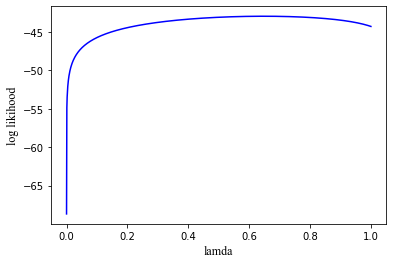

In [12]:
import matplotlib.pyplot as plt
plt.plot(lamda_list,L_list,'b')
plt.xlabel('lamda', fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.ylabel('log likihood', fontdict={'family' : 'Times New Roman', 'size'   : 12})
plt.show()